In [1]:
%load_ext autoreload
%autoreload 2

from src.util import load_coauthor_nx, ddir, fn_nodes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
(G, nodes) = load_coauthor_nx() # abstracted into src

N nodes 361 ; N not nodes: 368
Proportion who did not coauthor 50.48010973936899
Name: 
Type: Graph
Number of nodes: 361
Number of edges: 463
Average degree:   2.5651


In [3]:
# correlate degrees and N of species described

In [4]:
fn_spp = ddir + '2019-05-23-Apoidea world consensus file Sorted by name 2019 describers_2.0-denormalised.csv'
spp = pd.read_csv(fn_spp)[["idx", "full.name.of.describer.n"]]
spp = spp[spp.duplicated(subset="idx", keep=False)] # keep only those with >1 authors

spp_counts = spp.groupby('full.name.of.describer.n').agg('count')
spp_counts_valid = spp[spp.idx<=20669].groupby('full.name.of.describer.n').agg('count')
spp_counts.columns = ['collab_spp_N']
spp_counts_valid.columns = ['collab_ns_spp_N']
spp_counts = spp_counts.merge(spp_counts_valid, "outer", on="full.name.of.describer.n")

auth = pd.read_csv(fn_nodes)[["full.name.of.describer.n", "ns_spp_N", "syn_spp_N", "spp_N"]]
spp_counts = spp_counts.merge(auth, "outer", on="full.name.of.describer.n")

nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient="index")
n = nodes[['degree', 'betweenness', 'eigenvector']].reset_index()
n.columns = ['full.name.of.describer.n', 'degree', 'betweenness', 'eigenvector']

spp_counts = spp_counts.merge(n, "outer", on="full.name.of.describer.n")
spp_counts = spp_counts[spp_counts['collab_spp_N'].notna()]
spp_counts = spp_counts[spp_counts['degree'].notna()]

[Text(0, 0.5, 'Degree'),
 Text(0.5, 0, '\n Number of species collaboratively described')]

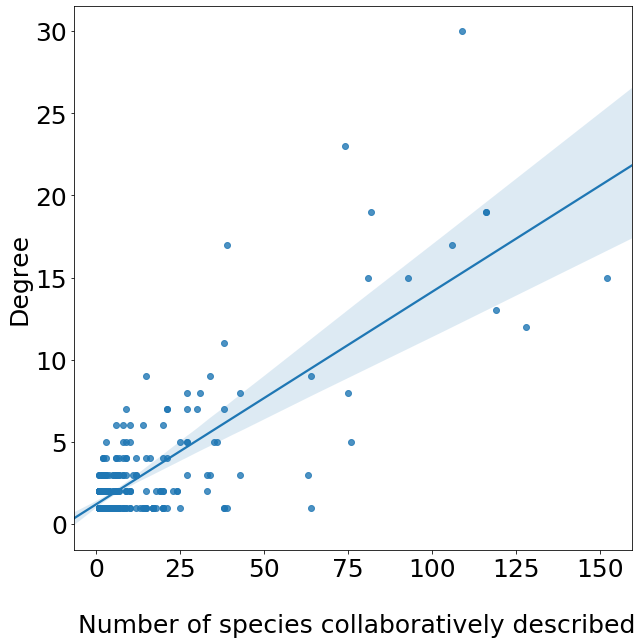

In [30]:
plt.figure(figsize=(10, 10))
plt.rc('font', size=25)
ax = sns.regplot(x=spp_counts['collab_spp_N'], y=spp_counts['degree'])
ax.set(xlabel='\n Number of species collaboratively described', ylabel='Degree')


In [11]:
x, y = spp_counts[['degree']], spp_counts['collab_spp_N'].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6375452416054995
intercept: -2.003029669310246
slope: [4.9288269]


In [12]:
X2 = sm.add_constant(spp_counts['degree'])
est = sm.OLS(spp_counts['collab_spp_N'], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           collab_spp_N   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     631.5
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.05e-81
Time:                        17:07:32   Log-Likelihood:                -1426.2
No. Observations:                 361   AIC:                             2856.
Df Residuals:                     359   BIC:                             2864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0030      0.833     -2.405      0.0

/home/ejysoh/miniconda3/envs/msc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
